In [12]:
import pandas as pd
import os
from scipy import signal

import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, BatchNormalization, MaxPooling2D # tf2.0 MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.python.keras.callbacks import TensorBoard
from time import time
import random

#%%matplotlib inline

## Reading files and re-exploring new-shaped spectrograms 

In [13]:
cwd = os.getcwd()
filepath = cwd + '/data/osc_data/'
par_folders = next(os.walk(filepath))[1]
folder = par_folders[0]
ch_folder_path = cwd + '/data/osc_data/' + folder
files = next(os.walk(ch_folder_path))[2]
file = files[0]
file_df = pd.read_csv(ch_folder_path + '/' + file, sep=',')
print(par_folders)
print(ch_folder_path)
print('folder:', folder)
print('file:', file)

['alpha', 'right', 'stop', 'omega', 'go', 'left', 'neutral']
/nfs/2018/j/jcruz-y-/Desktop/ml_piscine/neurosleeve/data/osc_data/alpha
folder: alpha
file: jose_1_alpha_7_26.csv


In [14]:
file_df.head()

,ch1,ch2,ch3,ch4
0,-33.99,-541.97,-71.61,60.61
1,-22.28,-473.96,-125.56,28.82
2,5.73,-338.79,-130.38,-5.43
3,-25.76,-507.57,-119.21,20.62
4,7.00,-432.08,-115.92,14.51


## Alpha

folder alpha
file jose_1_alpha_5_35.csv
spec_shape (6, 21)
frequencies_shape (6,)
times_shape (21,)


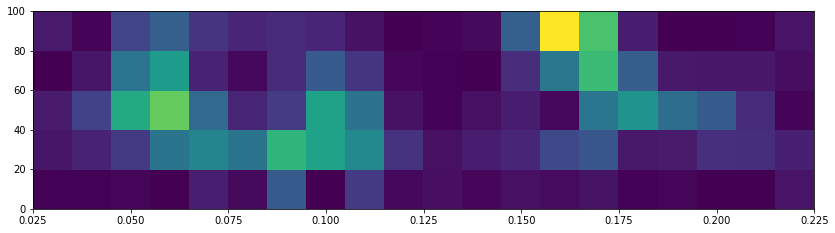

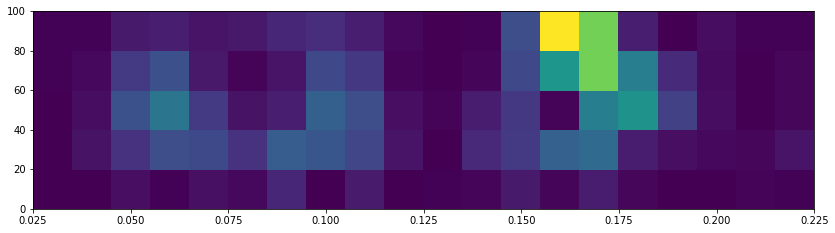

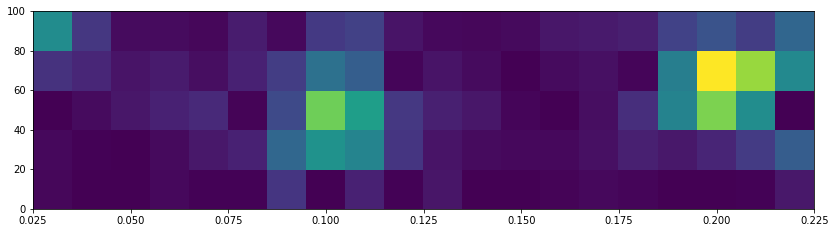

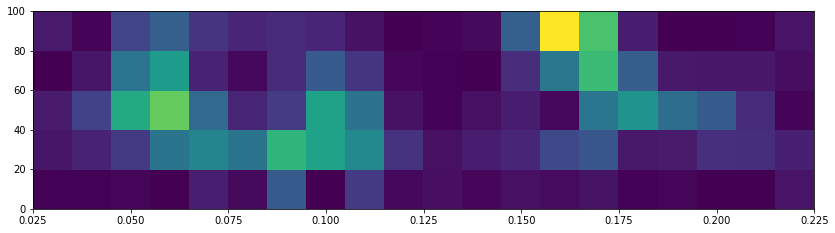

In [21]:
folder = par_folders[0]
print('folder', folder)
ch_folder_path = cwd + '/data/osc_data/' + folder
files = next(os.walk(ch_folder_path))[2]
file = random.choice(files)
print('file', file)
file_on = pd.read_csv(ch_folder_path + '/' + file, sep=',')
nperseg=10
#increasing nperseg increases frequency resolution and decreases time res
noverlap=8
#increasing time resolution requires increasing overlap, 
frequencies, times, spec = signal.spectrogram(x=file_on['ch4'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
print('spec_shape', spec.shape)
print('frequencies_shape', frequencies.shape)
print('times_shape', times.shape)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
frequencies, times, spec = signal.spectrogram(x=file_on['ch2'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
frequencies, times, spec = signal.spectrogram(x=file_on['ch3'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
frequencies, times, spec = signal.spectrogram(x=file_on['ch4'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show

## Random gesture

gesture: left
file: jose_2_left_3_34.csv
spec_shape: (6, 21)
frequencies_shape: (6,)
times_shape: (21,)


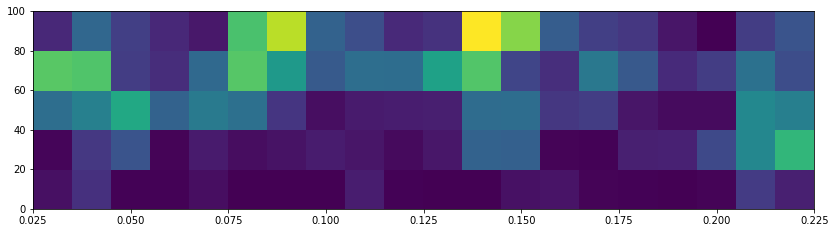

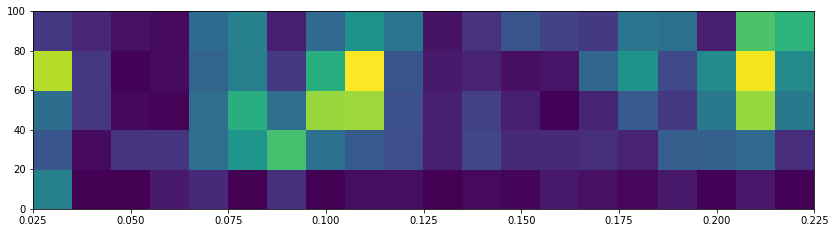

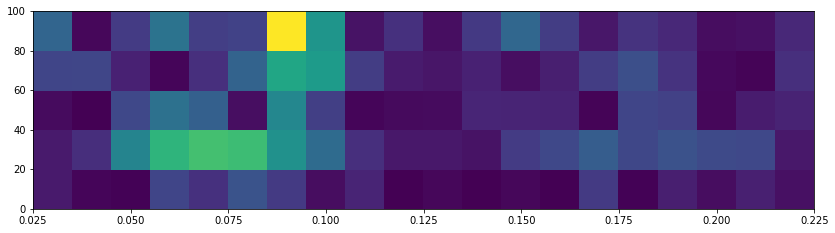

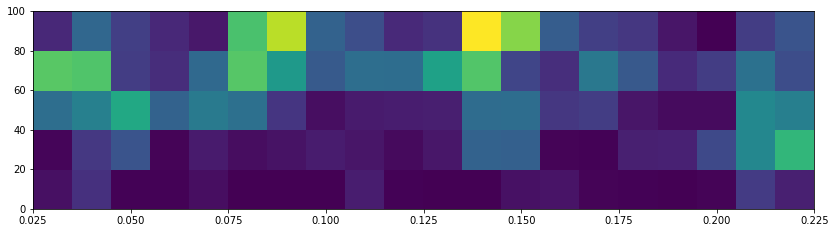

In [22]:
folder = random.choice(par_folders)
print('gesture:', folder)
ch_folder_path = cwd + '/data/osc_data/' + folder
files = next(os.walk(ch_folder_path))[2]
file = random.choice(files)
print('file:', file)
file_on = pd.read_csv(ch_folder_path + '/' + file, sep=',')
nperseg=10
#increasing nperseg increases frequency resolution and decreases time res
noverlap=8
#increasing time resolution requires increasing overlap, 
frequencies, times, spec = signal.spectrogram(x=file_on['ch4'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
print('spec_shape:', spec.shape) #'spec', spec)
print('frequencies_shape:', frequencies.shape)
print('times_shape:', times.shape)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
frequencies, times, spec = signal.spectrogram(x=file_on['ch2'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
frequencies, times, spec = signal.spectrogram(x=file_on['ch3'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
frequencies, times, spec = signal.spectrogram(x=file_on['ch4'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show

# Model

In [26]:
path = cwd + '/data/osc_data'

In [28]:
lbl_folders = next(os.walk(path))[1]
lbl_folders

['alpha', 'right', 'stop', 'omega', 'go', 'left', 'neutral']

In [29]:
shape = (6, 21, 4)
flat_dim = shape[0]*shape[1]*shape[2]
nperseg = 10
noverlap = 8
reshape = (-1, shape[0], shape[1], shape[2])

## Read data to create dataframe with spectograms

In [31]:
###
cwd = os.getcwd()
path = cwd + '/data/osc_data'
lbl_folders = next(os.walk(path))[1]
folders_path = 'data/osc_data'
channels = ['ch1', 'ch2', 'ch3', 'ch4']
###
shape = (6, 21, 4)
flat_dim = shape[0]*shape[1]*shape[2]
nperseg = 10
noverlap = 8
reshape = (-1, shape[0], shape[1], shape[2])
j = 0
i = 0
dir_num = 0
df_train_g = pd.DataFrame()
for folder in lbl_folder_clean:
    filepath = os.path.join(cwd, folders_path, folder)
    files = next(os.walk(filepath))[2]
    num_examples = len(files)
    x_shape = (num_examples, 6, 21, 4)
    x1_train = np.zeros(x_shape)
    j = 0
    for filename in files:
        file = pd.read_csv(os.path.join(cwd, folders_path, folder, filename), sep=',')
        img = np.zeros(shape)
        k = 0
        for i in range(4):
            frequencies, times, spec = signal.spectrogram(x=file[channels[i]], fs=200,
                                                          nperseg=nperseg, noverlap=noverlap,
                                                          window='hann')
            log_spec = np.log(spec)
            img[:,:,i] = spec
            i = i + 1
        x1_train[j,:,:,:] = img
        j = j + 1
    print(folder, x1_train.shape)
    flat = np.reshape(x1_train, (num_examples, flat_dim))
    df_train1 = pd.DataFrame(data=flat)
    vals = np.array([dir_num] * num_examples)
    dir_num = dir_num + 1
    df_train1['label'] = vals
    df_train_g = df_train_g.append(df_train1, ignore_index=True)

alpha (1160, 6, 21, 4)
right (1080, 6, 21, 4)
stop (1160, 6, 21, 4)
omega (1160, 6, 21, 4)
go (1120, 6, 21, 4)
left (1120, 6, 21, 4)
neutral (1040, 6, 21, 4)


In [32]:
df_train_g.head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,label
0,0.269763,0.000007,2.690894,0.285193,4.696668,26.142539,5.916528,5.797650,1.394728,1.576310,...,3.841037,3.091718,16.319097,1.561007,2.145334,1.286712,6.197624,0.272434,0.917669,0
1,0.762344,0.009737,0.354214,0.000517,0.203516,0.193552,0.906154,0.016050,1.219763,1.619854,...,0.233409,0.711764,0.001415,5.419373,1.753770,2.752352,12.246400,8.266206,0.920694,0
2,0.012787,1.610314,0.105238,0.023809,0.747766,0.020359,6.185523,0.869656,0.088764,0.037561,...,0.000238,0.000509,0.956125,1.155039,0.029721,1.450493,0.545698,8.199032,0.078900,0
3,3.198062,1.395169,3.978304,0.476088,0.032568,0.091444,0.021168,0.076012,0.049189,5.689870,...,0.254437,1.999421,100.944967,0.311347,0.118430,1.928447,118.050244,0.869525,0.702323,0
4,1.832447,0.254555,0.309685,0.020131,3.494906,7.610915,1.930834,0.832520,0.342319,3.308603,...,0.033883,0.010655,0.000876,3.320260,0.008457,0.002498,0.364157,0.591829,0.008037,0


In [37]:
def preprocess_features(x_train):
    #Normalization to greyscale, reduces the effect of illumination's differences
    x_train = x_train.replace(-np.inf, 0)
    x_train = np.log(x_train.values)
    x_train_norm = x_train.reshape(reshape)
    return x_train_norm

In [38]:
def preprocess_targets(y_train):
    y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes=7)
    return y_train_hot

In [39]:
int(df_train_g.shape[0]*.8)

6272

In [40]:
#df_train_rand = preprocess_data(df_train)
df_train_g = df_train_g.reindex(np.random.permutation(df_train_g.index))
X_train = preprocess_features(df_train_g.drop(labels = ['label'], axis = 1).head(int(df_train_g.shape[0]*.8)).copy())
X_test = preprocess_features(df_train_g.drop(labels = ['label'], axis = 1).tail(int(df_train_g.shape[0]*.2)).copy())
Y_train = preprocess_targets(df_train_g['label'].head(int(df_train_g.shape[0]*.8)).copy())
Y_test = preprocess_targets(df_train_g['label'].tail(int(df_train_g.shape[0]*.2)).copy())

In [41]:
df_train_g.head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,label
539,0.057230,0.005452,0.001521,0.485260,1.250760,6.168743,6.129050,1.546179,0.527948,0.598214,...,0.021409,0.032397,0.911666,5.899837,2.286116,0.220980,6.591936,24.775299,6.830713,0
7493,4.330971,0.341549,0.001275,0.030283,1.630238,0.053847,0.041675,0.037403,0.571093,1.482740,...,0.017513,0.215008,1.519928,0.029591,0.016857,2.887141,0.457261,0.004708,0.008524,6
4136,24.842679,1.883987,0.006252,0.001512,18.459203,3.506373,0.398243,0.063850,2.884521,0.290693,...,0.157790,1.374931,73.328768,0.469867,0.668638,52.825376,133.300410,0.644778,1.229565,3
2474,1.062699,4.556972,4.646520,1.992116,1.819312,0.288224,0.714687,0.460312,0.852265,5.589021,...,0.052340,0.177240,0.491709,15.853243,3.957586,3.261627,0.030761,18.742029,10.847451,2
2958,9.087598,4.152501,1.830647,0.868659,16.290051,88.581310,20.235844,15.294527,6.600453,8.185341,...,7.257913,78.266078,20.124063,12.920450,8.375845,62.215709,0.090035,1.080485,0.270089,2


In [42]:
X_train.shape

(6272, 6, 21, 4)

In [78]:
def create_model(input_shape):
    inputlayer = Input(shape=input_shape)
    nclass = 7
    
    norm_input = BatchNormalization()(inputlayer)
    model = Conv2D(32, kernel_size=2, padding='same', activation='relu')(norm_input)
    model = Conv2D(32, kernel_size=2, padding='same', activation='relu')(model)
    model = MaxPooling2D(pool_size=(2, 2))(model)
    model = Dropout(rate=0.2)(model)
    model = Conv2D(64, kernel_size=3, padding='same', activation='relu')(model)
    model = Conv2D(64, kernel_size=3, padding='same', activation='relu')(model)
    model = MaxPooling2D(pool_size=(2, 2))(model)
    model = Dropout(rate=0.2)(model)
    model = Conv2D(128, kernel_size=3, padding='same', activation='relu')(model)
    model = Conv2D(128, kernel_size=3, padding='same', activation='relu')(model)
    model = MaxPooling2D(pool_size=(1, 1))(model)
    model = Dropout(rate=0.2)(model)
    model = Conv2D(256, kernel_size=2, padding='same', activation='relu')(model)
    model = Conv2D(256, kernel_size=2, padding='same', activation='relu')(model)
    model = MaxPooling2D(pool_size=(1, 1))(model)
    model = Dropout(rate=0.2)(model)
    model = Conv2D(512, kernel_size=2, padding='same', activation='relu')(model)
    model = Conv2D(512, kernel_size=2, padding='same', activation='relu')(model)
    model = MaxPooling2D(pool_size=(1, 1))(model)
    model = Flatten()(model) 

    dense_1 = BatchNormalization()(Dense(128, activation='relu')(model))
    dense_1 = BatchNormalization()(Dense(128, activation='relu')(dense_1))
    dense_1 = Dense(nclass, activation='softmax')(dense_1)

    model = Model(inputs=inputlayer, outputs=dense_1)
    
    return model

In [79]:
model3 = create_model(shape)

In [80]:
print(model3.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 6, 21, 4)]        0         
_________________________________________________________________
batch_normalization_v2_16 (B (None, 6, 21, 4)          16        
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 6, 21, 32)         544       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 6, 21, 32)         4128      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 10, 32)         0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 3, 10, 32)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 3, 10, 64)         1849

In [81]:
optimizer = tf.keras.optimizers.Adam(lr = 0.0001,
                                   beta_1 = 0.9,
                                   beta_2 = 0.999,
                                   epsilon = 1e-08)

In [87]:
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
#model3.compile(optimizer = optimizer, loss = 'category_crossentropy', metrics = ['accuracy'])

In [89]:
tensorboard = TensorBoard(log_dir='./logs/{}'.format(time()))

In [90]:
Y_train.shape

(6272, 7)

In [ ]:
history = model3.fit(X_train,
                   Y_train,
                   batch_size=50,
                   epochs=80,
                   validation_split=0.1,
                   #validation_data=(X_val, Y_val),
                   callbacks=[tensorboard])

Train on 5644 samples, validate on 628 samples
Epoch 1/80
5644/5644 [==============================] - 20s 4ms/sample - loss: 0.1729 - accuracy: 0.9350 - val_loss: 0.2319 - val_accuracy: 0.9140
Epoch 2/80
5644/5644 [==============================] - 19s 3ms/sample - loss: 0.1481 - accuracy: 0.9472 - val_loss: 0.2422 - val_accuracy: 0.9220
Epoch 3/80
5644/5644 [==============================] - 20s 4ms/sample - loss: 0.1504 - accuracy: 0.9484 - val_loss: 0.2746 - val_accuracy: 0.9140
Epoch 4/80
5644/5644 [==============================] - 21s 4ms/sample - loss: 0.1513 - accuracy: 0.9445 - val_loss: 0.2508 - val_accuracy: 0.9220
Epoch 5/80
5644/5644 [==============================] - 20s 4ms/sample - loss: 0.1443 - accuracy: 0.9481 - val_loss: 0.2489 - val_accuracy: 0.9220
Epoch 6/80
5644/5644 [==============================] - 26s 5ms/sample - loss: 0.1440 - accuracy: 0.9486 - val_loss: 0.2626 - val_accuracy: 0.9140
Epoch 7/80
5644/5644 [==============================] - 20s 3ms/sample 

In [91]:
preds = model3.predict(X_test)

In [92]:
preds[0]

array([1.5306866e-03, 5.6170285e-07, 9.9102271e-01, 3.6984850e-06,
       1.1571619e-04, 7.2272187e-03, 9.9570527e-05], dtype=float32)

Evaluate accuracy on never before seen data

In [93]:
evaluate = model3.evaluate(X_test, Y_test)

1568/1568 [==============================] - 0s 183us/sample - loss: 0.3155 - acc: 0.8903


Save model

In [94]:
model3.save('models/model_2.h5')